In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)

In [2]:
dataset='/content/archive (2).zip'
from zipfile import ZipFile
with ZipFile(dataset, 'r') as zip:
   # Extract all the contents of zip file in current directory
   zip.extractall()

In [3]:
df=pd.read_csv('/content/movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.shape

(7668, 15)

In [7]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [8]:
df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [9]:
# handling the missing values
import pandas as pd

# Fill categorical columns with mode or 'Unknown'
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['company'].fillna('Unknown', inplace=True)
df['writer'].fillna('Unknown', inplace=True)
df['star'].fillna('Unknown', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Fill numeric columns with median
df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(df['votes'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)
df['runtime'].fillna(df['runtime'].median(), inplace=True)




# Option 1: Fill with median
df['budget'].fillna(df['budget'].median(), inplace=True)

df.dropna(subset=['released'],inplace=True)



/tmp/ipython-input-9-2603806846.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)
/tmp/ipython-input-9-2603806846.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [10]:
df.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


In [11]:
# convert the dtypes from float to int
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [12]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [13]:
# adding the correct year column
df['year_correct'] = df['released'].str.extract(r'(\d{4})')


In [14]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [15]:
#sorting the data using the gross column
df.sort_values(by='gross',inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [16]:
# finding the correlation of numeric columns to gross
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.098189,0.222581,0.291789,0.259611,0.120713
score,0.098189,1.000000,0.409196,0.061880,0.185514,0.399403
votes,0.222581,0.409196,1.000000,0.460979,0.632136,0.309156
budget,0.291789,0.061880,0.460979,1.000000,0.745875,0.273361
gross,0.259611,0.185514,0.632136,0.745875,1.000000,0.244369
runtime,0.120713,0.399403,0.309156,0.273361,0.244369,1.000000


Text(0, 0.5, 'gross')

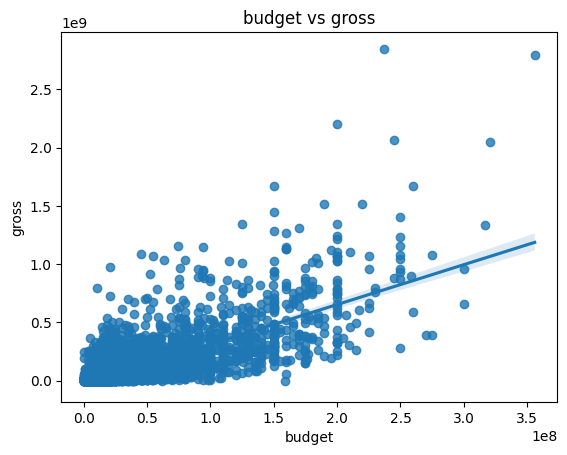

In [18]:
# visualising the correlation between budget and gross
sns.regplot(data=df,x='budget',y='gross')
plt.title('budget vs gross')
plt.xlabel('budget')
plt.ylabel('gross')

In [19]:
corr_matrix=df.corr(numeric_only=True)

Text(77.92222222222227, 0.5, 'features')

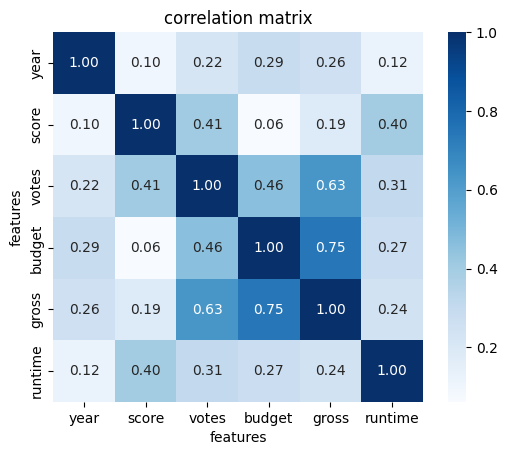

In [20]:
# showing the correlation between numerical columns in a heatmap
sns.heatmap(corr_matrix,annot=True,cmap='Blues',fmt='.2f',square=True)
plt.title('correlation matrix')
plt.xlabel('features')
plt.ylabel('features')

In [21]:
# convert object columns to numeric so that we can see if they are correlated to gross
df_numerized=df
for col in df_numerized.columns:
  if df_numerized[col].dtype=='object':
    df_numerized[col]=df_numerized[col].astype('category')
    df_numerized[col]=df_numerized[col].cat.codes

In [34]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6586,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2320,146.0,0
1,5572,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5141,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


Text(70.72222222222221, 0.5, 'features')

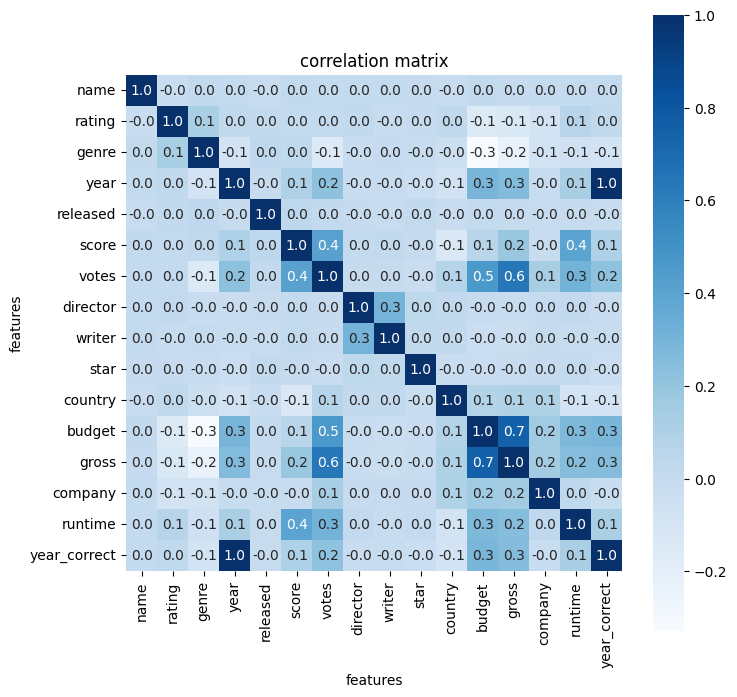

In [27]:
# ploting the whole data and showing how they are correlated to each other
numerized_corr=df_numerized.corr()
plt.figure(figsize=(8,8))
sns.heatmap(numerized_corr,annot=True,cmap='Blues',fmt='.1f',square=True)
plt.title('correlation matrix')
plt.xlabel('features')
plt.ylabel('features')

In [32]:
# we want to find which colums have the highest correlation
numerized_corr=df_numerized.corr()
unstacked=numerized_corr.unstack().sort_values()
unstacked

,,0
genre,budget,-0.328455
budget,genre,-0.328455
gross,genre,-0.233342
genre,gross,-0.233342
rating,budget,-0.148500
budget,rating,-0.148500
votes,genre,-0.145313
genre,votes,-0.145313
country,score,-0.134488
score,country,-0.134488


In [33]:
high_corr=unstacked[(unstacked)>0.5]
high_corr

,,0
gross,votes,0.632136
votes,gross,0.632136
gross,budget,0.745875
budget,gross,0.745875
year,year_correct,0.997415
year_correct,year,0.997415
director,director,1.000000
votes,votes,1.000000
released,released,1.000000
score,score,1.000000
